In [1]:
import numpy as np
import pandas as pd

In [2]:
# load the data

In [3]:
loan_data_preprocessed_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (21,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# explore the data

In [315]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [316]:
loan_data_preprocessed.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1, inplace=True)

In [7]:
# lgd --> the percentage of exposure that was lost after the boroweer defulted
# ead - > the amount of exposure at the moment the boroweer deaulted

In [8]:
# naturally these data exist and can be seen only for the accounts that have deaulted
# it would not be entirely accurate to include all accounts for modeling LGD and EAD 

# it is becuase after borrowe deaulted they can repay part of the debt so lender can recover part of the amoint they 
# thought would be lost
# therefor when building LGD and EAD model, it is a good practice to build models with data from borrowers that have
# had enough time to repay part of the remaining debt 
# in our data these are only the account that are written-off

In [9]:
# if the loan_status is charged_off , doesnot_meet_the_credit_poliy: status: charged off

In [10]:
pd.options.display.max_columns = None

In [11]:
loan_data_preprocessed.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'addr_state:UT', 'addr_state:VA', 'addr_state:VT', 'addr_state:WA',
       'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w', 'good_bad'],
      dtype='object', length=207)

In [12]:
loan_data_preprocessed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,NaN,10.0,1985-01-01,395.0,36,2011-12-01,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Veri

In [13]:
loan_data_preprocessed['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [14]:
# 'Does not meet the credit policy. Status:Charged Off','Charged Off' 
# by choosing only the data contining these values , we would have chossen the data for building LGD and EAD model

In [15]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Does not meet the credit policy. Status:Charged Off', 'Charged Off'])]

In [16]:
loan_data_defaults.shape

(43236, 207)

In [17]:
# there are around 43000 such accounts

In [18]:
# the independent var we are going to use for LGD and EAD models are same as the PD model

In [19]:
pd.options.display.max_rows = None

In [20]:
loan_data_defaults.isnull().sum()

id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                                         0
annual_inc                                         

In [21]:
# the only two var with missing value we intend to use are mnth_sine_lasr_delinq and mnths_since_last_record

# back then we created a dummy variable for missing valus 
# but for LGD and EAD model, they are not req to be easily comprehend
# the ind var in LGD and EAD odels do not have to be nly dummy vairbales  like in the PD model

# thus we dont care about WOE criteria to group the category

In [22]:
# for discrete var we are going to crate as many dummy var as the number of categories 
# we can use the continuous var as they re or transform them. there is no need for fine classing or coarse classing

In [23]:
# for mnths_since_last_delinq and mnths_since_last_recr we will use them as continuous in our new model
# however we still have the missing values problems

# many factors need to be considered for imputing the missing values, for now to not complicate things to much it would
# be suffiecint to imput them with values of 0 (takign the most conservative approach to risk)

### Independent Variables

In [24]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace=True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
# we shall be working on each model either LGD or EAD at a time
# here we will use one dataset for storing the data needed for both models

# lets start with loss given default

In [26]:
 # lgd: proportion of the total exposure not recovered
# but in established approach, we model the prop of total exposure that can be recovered by the lender once a deault
# has occured ,,, this prop is called --- Recovery rate 

# from here, the prop that cant be recovered -- i.e lGD = 1- recovery rate

In [27]:
# we can find the amount recovered in the columns "recoveries"
# we assumed that for defaulted borrower 'funded_amts' reflect the total amount that was lost the moment the borrower
# defaulted

In [28]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']

<ipython-input-28-d3867e2a2fc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']


In [29]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [30]:
# since the recovery rate is a rate  it should be beten 0-1 ,, but in this case max  1.220774
# in these case we can truncate the alues outsie this range to either 0 or 1


In [31]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']>1,1,loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']<0,0,loan_data_defaults['recovery_rate'])


<ipython-input-31-b99c4d41b2c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']>1,1,loan_data_defaults['recovery_rate'])
<ipython-input-31-b99c4d41b2c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate']<0,0,loan_data_defaults['recovery_rate'])


In [32]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [33]:
# all the rec rate value is in the natureal domain of 0 and 1

# recovery_rate is the dependent variable for LGD model and we have successfully preprocessed it.

In [34]:
## EAD -- it is the maximum that the bank may lose whan the borrowe defaults

# borrowe may not have dispersed the whole amount lended by the bank
# aslo the borrowe may have repaid the sig amount of debt at the time of deafult 
# for evolving facilities such as credit cards and xome consumer loans the borrowe may be able to repay and spend what
# they have already repaid again upto a certian limit called the credit limit

# so , a borrower may only have defaulted on proportion on the original funded amont -- that prop will be our dependent
# var for EAD model -- this prop is called **credit converison factor **

# EAD = total funded factor * credit conversion factor

In [35]:
# "total recovered principal" reflects the total paments made on the principal of the loan 
# let Credit converiosn facotr -- CCF

In [36]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt']-loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']

<ipython-input-36-3d75719ef382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt']-loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']


In [37]:
# if CCF=0, all is paid
# CCF =1, nothing has been paid

In [38]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [39]:
loan_data_defaults.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad,recovery_rate,CCF
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN,0.0,1999-04-01,224.0,60,2011-12-01,72.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.046832,0.817416
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,

In [40]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

### Explore the Dependent Variable (Recovery rate and CCF)

In [41]:
# both of these dep var are resrited in the range of 0-1

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

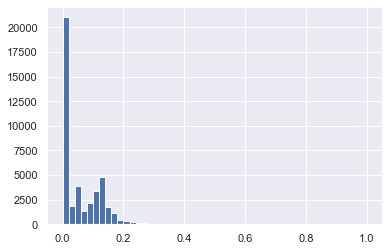

In [43]:
plt.hist(loan_data_defaults['recovery_rate'], bins=50)

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

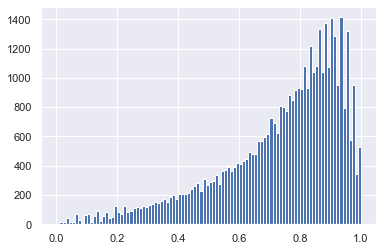

In [44]:
plt.hist(loan_data_defaults['CCF'],bins=100)

In [45]:
# the two var are constrained bet 0 and 1 ,,
# methodologically speaking, the the density of proportion is best describes as the specific dist called the beta-dist
# the reg model used to assses the impact of set of independent var on a var with beta-dist is called beta-regression

# normally, it is used to model outcomes that re stricylt gretet than 0 and outcomes that re stricly less than 1
# however some alterations allow for modeling out outcomes that re grater than or equal to 0 and less than or eual to 1 
# wihch is typically the case with recovery rate and CCF

In [46]:
# should use state of the art beta regression, but stable version is not suuported by python - thus we choose to use simpler
# yet methodologically appropriate statistical models
# like linear and logistic regrssion

In [47]:
# let us look at LGD first

# the dist of recovery rate we can see that about 1/2 of the obs have rec reate of 0 
# so for estimating LGD it is plausible to have 2 stage appraoch 

# 1. is rec rate equal to 0 or grater than 0? 
# 2. if rec rate > 0, how much exaclty is it? 


# the fitst qsn is the binary qsn, similar to PD where we modeled whether borr has defaulted or not - thus use logistic
# regression
# for this model we need to crete new binary dependent var 

In [48]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate']==0,0,1)

<ipython-input-48-0ea8dc8483e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate']==0,0,1)


In [49]:
# now we can take only the acc where the rec rate is > 0 and model how much eaxylt it is
# the easir way to do that is suing linear regression

In [50]:
## CCF re more homogeneously distributed ,, direcly appl

### LGD model

In [51]:
# to test how our model did, we need to split the data into training and test set 

In [52]:
from sklearn.model_selection import train_test_split

In [124]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split((loan_data_defaults.drop(['good_bad','recovery_rate','CCF','recovery_rate_0_1'],axis=1)),loan_data_defaults['recovery_rate_0_1'], test_size=0.2, random_state=42)

In [125]:
# we will set the random state to 42 so we can replicate the exact same splot everytime

In [126]:
##prepare the inputs
# let us organize the independent variable we will need in a list

In [127]:
# df_cols = pd.DataFrame(loan_data_defaults.columns)
# df_cols

In [128]:
# in any regression model, categorical variable with k categories is represented by k-1 DUMMY variables
# else we will observe multi-collinaerity,, the dummy we will leave will serve as reference category
# unlike PD model , here we can select any var as reference

In [129]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:ANY',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [130]:
feature_ref_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [131]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [132]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(feature_ref_cat,axis=1)

In [133]:
# now lgd_inputs_state_1_train contain only the variable we need to trian our model

#### Estimating the model

In [134]:
# the logistic regresion class in sklearn was not able to give us the p-values. For PD model we have to alter it a bit
# and we will have to do the same here

In [135]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    # we inherit everything for original logistic regression class
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
    # we define a fit function which overwrites original .fit()  with a function that calculates multivariate p-values too 
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        F_ij = F_ij+0.0000000000000000001*np.random.rand(F_ij.shape[0],F_ij.shape[1])
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores]
        self.coef_= self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [136]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train,lgd_targets_stage_1_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
# we can copy the code we used to disply the summary table

In [143]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [144]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0]=['Intercept',reg_lgd_st_1.intercept_[0]]
summary_table= summary_table.sort_index()

p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-8.198418e-05,NaN
1,grade:A,-9.987207e-06,9.999053e-01
2,grade:B,-6.613486e-05,9.992257e-01
3,grade:C,-1.325182e-04,9.983953e-01
4,grade:D,2.235807e-05,9.997402e-01
5,grade:E,1.581326e-05,9.998334e-01
6,grade:F,7.609723e-05,9.993027e-01
7,home_ownership:ANY,0.000000e+00,1.000000e+00
8,home_ownership:MORTGAGE,-3.591829e-05,9.988697e-01
9,home_ownership:NONE,9.257266e-07,9.999991e-01


In [145]:
# for p-values most of them are not statistically significant
# that means if we throw these variable out of the model its predictive power would remain unchanged or  we may as well
# keep them,, eithe way it does not make much difference of how well it makes the recovery

# most often than not we prefer to leave them out to simplify the model

In [146]:
# while interpreting the coeff, we have continuous variables as well.
# their coeff reflect the change in log-odds that results form a unit change in the property the continuous variable 
# measures 

# for eg: for every unit increse in funded amoount , the log-odds of recovery rate being greater than 0
## will increase by 2.722920e-05

# for every unit increse in debt to income, the log odds will decrese by 5.316779e-03

### Testing the Model

In [147]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(feature_ref_cat,axis=1)

In [148]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [149]:
# here we get the raw prediction about the recovery rate

In [150]:
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 1, 1, 1])

In [151]:
# it would be even better to get the estimated probabilities of the rec rate value

In [152]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [153]:
y_hat_test_proba_lgd_stage_1

array([[0.39321429, 0.60678571],
       [0.38838757, 0.61161243],
       [0.54275619, 0.45724381],
       ...,
       [0.49930137, 0.50069863],
       [0.4081813 , 0.5918187 ],
       [0.45779795, 0.54220205]])

In [154]:
# it would sufficient to keep only the  prob for rec rate grater than 0 

In [155]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[:][:,1]

In [156]:
y_hat_test_proba_lgd_stage_1

array([0.60678571, 0.61161243, 0.45724381, ..., 0.50069863, 0.5918187 ,
       0.54220205])

In [157]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [159]:
lgd_targets_stage_1_test_temp.reset_index(drop=True, inplace=True)

In [160]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)],axis=1)

In [162]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test','y_hat_test_proba_lgd_stage_1']

In [164]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

In [165]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
178928,1,0.606786
69814,1,0.611612
101396,0,0.457244
463268,1,0.556459
253729,0,0.416209


In [166]:
### Estimating the Probability of the model

In [167]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1']>tr,1,0)

In [168]:
# to create confusion matrix

In [169]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_lgd_stage_1'],rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,979,2783
1,685,4201


In [170]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_lgd_stage_1'],rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.113205,0.321809
1,0.079209,0.485777


In [171]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0]+(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1]

0.5989824236817761

In [174]:
# accuray at a given cut off is not as informative as the Receiver Operating Characteristic Curve (ROC) curve
# which shows TP rate as the function of FP rate esentially covering all possible cut off points

In [175]:
from sklearn.metrics import roc_curve,roc_auc_score

In [176]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

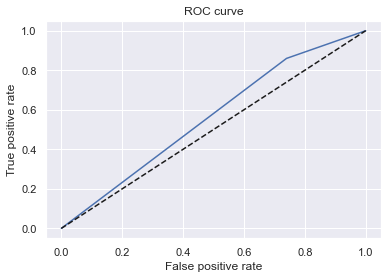

In [177]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,ls='--',color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [179]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_lgd_stage_1'])
AUROC

0.5600187191953139

In [180]:
# we are going to use this model as first stage of estimating LGD

In [182]:
# thus is is more imp to have a large prop of correclty classified values that are greater than 0, han to have correcly
# classified 0
# beacuse at the second stage where we applu the Linear Regression model some of the value classifeid as >0 may still
# be estimated to be 0 by the second model, thus correcting the current misclassificaiton

In [184]:
# usually when done training and after deciding which model you are gooing to use,, you save the model
# we want to create a file that will contain the following informaiton:
# this ml model is a logistic regression. it has these and these coeff and intercepts. the random state that wass
# choosen fot the shuffle was 42. .... 

In [185]:
# object reg_lgd_st_1 contains all these informaiton,, thus save this object

In [187]:
# using pickle module,,, a python module for converting python module into character stream (string) and vv
# this character stream will contain sufficient informaiton
# to convert charater stream into object we will unpickle it
# it will be a file smaller than 1kb

In [188]:
import pickle

In [191]:
pickle.dump(reg_lgd_st_1,open('lgd_model_stage_1.sav','wb'))

In [190]:
# dump(save) objectname filename, writebytes
# load filename, readbytes ------> while loading

### Stage2- Linear Regression

In [193]:
# to estimate recovery rate that are above 0
# the model will be multiple linear regression modelthat will estimate the recovery rate

In [194]:
# all borrower with recovery rate >0 were encoded as 1 in recovery_rate_0_1 columns

In [195]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1']==1]

In [196]:
# split the data into train and test

In [197]:
lgd_inputs_stage2_train, lgd_inputs_stage2_test,lgd_targets_stage2_train,lgd_targets_stage2_test = train_test_split(lgd_stage_2_data.drop(['good_bad','recovery_rate','recovery_rate_0_1','CCF'],axis=1),lgd_stage_2_data['recovery_rate'], test_size=0.2,random_state=42)

In [199]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [201]:
# similar to logistic regression class, linear regression class does not show p-values for the estimated regression coeff

In [216]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self,fit_intercept=True,normalize=False,copy_X=True,n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X,y,n_jobs=1):
        self = super(LinearRegression,self).fit(X,y,n_jobs)
        sse = np.sum((self.predict(X)-y)**2,axis=0)/float(X.shape[0]-X.shape[1])
        temp = np.dot(X.T,X)
        se = np.array([np.sqrt(np.diagonal(sse*np.linalg.inv(temp+0.00001*np.random.rand(temp.shape[0],temp.shape[1]))))])
        self.t = self.coef_/se
        self.p = np.squeeze(2*(1-stat.t.cdf(np.abs(self.t),y.shape[0]-X.shape[1])))
        return self

In [217]:
# lets preselct only the input variable we need

In [218]:
# lgd_inputs_stage2_train = lgd_inputs_stage2_train[features_all]

In [219]:
# lgd_inputs_stage2_train = lgd_inputs_stage2_train.drop(feature_ref_cat,axis=1)

In [215]:
lgd_inputs_stage2_train.shape

(19496, 45)

In [220]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage2_train,lgd_targets_stage2_train)

LinearRegression()

In [221]:
# create a summary table

In [222]:
feature_name = lgd_inputs_stage2_train.columns.values

In [226]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0]=['Intercept',reg_lgd_st_2.intercept_]
summary_table= summary_table.sort_index()

p_values = reg_lgd_st_2.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.406858e-01,NaN
1,grade:A,-6.826892e-02,0.000000e+00
2,grade:B,-5.083556e-02,0.000000e+00
3,grade:C,-3.748066e-02,0.000000e+00
4,grade:D,-2.717310e-02,1.973310e-12
5,grade:E,-1.315941e-02,1.919203e-03
6,grade:F,-5.260168e-03,2.748832e-01
7,home_ownership:ANY,1.176060e-12,1.000000e+00
8,home_ownership:MORTGAGE,2.832212e-03,6.050936e-02
9,home_ownership:NONE,1.459035e-01,9.101518e-05


In [227]:
# here the larger number of reg coeff are stat significant

In [228]:
# interpretatin of coefff:
# the coeff shows the change in the dependent var that is going to occur as result of the unit change in the respective
# independent variable

In [229]:
# for eg, if the purpose of the loan is education: the recovery rate will be 7.625467e-02*100=7.63% higher 
# also each dollar increase in annual income is expected to result in 0.0000064 higher recovery rate
# every % increse in interese rate is expected to result in 2.545% lower recovery 

In [230]:
# Linear Regreeion evaluaaiton

In [231]:
lgd_inputs_stage2_test = lgd_inputs_stage2_test[features_all]
lgd_inputs_stage2_test = lgd_inputs_stage2_test.drop(feature_ref_cat,axis=1)

In [232]:
lgd_inputs_stage2_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object

In [233]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage2_test)

In [234]:
# let us use corr betn actual and predicted value as proxy for model preformance

In [235]:
lgd_targets_stage2_test_temp = lgd_targets_stage2_test

In [236]:
lgd_targets_stage2_test_temp = lgd_targets_stage2_test_temp.reset_index(drop=True)

In [237]:
pd.concat([lgd_targets_stage2_test_temp,pd.DataFrame(y_hat_test_lgd_stage_2)],axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.307996
0,0.307996,1.000000


In [239]:
# the corr is about 0.308
# this is weak to model postitive corr in genral but satisfcoroy for lgd model
# if corr was very high we would have questined our methodology

In [240]:
# to assess our model ,we can look at the distribution of the diff betw actual and predicted value called residuals
# if everything ok this dist will be like a normal dist and we will have mean of 0

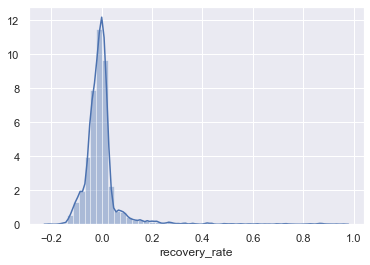

In [241]:
sns.distplot(lgd_targets_stage2_test-y_hat_test_lgd_stage_2)

In [242]:
# the dist resembles a normal dist and most of the dist are symmetriclaly dist aorund 0 
# 0 is where most of them are concentrated do it seems to be a very good model methodologocally

In [243]:
# saving the mode

In [244]:
pickle.dump(reg_lgd_st_2,open('lgd_model_stage_2.sav','wb'))

In [245]:
# to reach the actual LGD model we need to combine the two satges

In [247]:
### Combining stage 1 an stage 2

In [248]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_2_all

array([0.1193906 , 0.09605635, 0.13367631, ..., 0.12078611, 0.11587422,
       0.15667447])

In [249]:
# this is the recv rate estimated by the linear regression, no matter if they were predicted to be 0 or 1 by stage 1

In [251]:
# every obs classified as 0 by the stage 1 logistic reg model has estimated recovery rate of 0
# every obs classified as 1 by the stage 1 log reg model has the estimated recv rate as per the stage2 linear reg model

# we can reach the combined estimation by simply multiplying the prediced values from the two models

In [252]:
# wherever there is 0 predicted by the first model, all the values predicted by the second model are multiplied by
# it will remian 0 , and whenver there is a 1 all values predicted by the second model are multiplied by 1 so they'll
# remain the same

In [254]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 *y_hat_test_lgd_stage_2_all

In [255]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.087358
std,0.049829
min,-0.007634
25%,0.065373
50%,0.101222
75%,0.123580
max,0.236973


In [258]:
# the min value is -ve ,, because the linear reg model is not constained to produce values betn 0 and 1 , it can
# produce negative values
# but the natural domian of rec rate lies in value of 0 and 1
# we can amend this by setting all values les than 0 to be 0

In [259]:
y_hat_test_lgd = np.where(y_hat_test_lgd<0,0,y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd>1,1,y_hat_test_lgd)

In [260]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.087360
std,0.049826
min,0.000000
25%,0.065373
50%,0.101222
75%,0.123580
max,0.236973


In [261]:
# we have reached the final predictin of our LGD model

### EAD model (Exposure At Default)

In [262]:
# the dependent var for EAD model is CCF , the proportin from the original amount of loan that is still outstanding
# at the moment when the borrower defaulted

In [263]:
# by looking at the dist of CCF, we conclided that we can rely on the Linear Regressiion model

In [264]:
# Estimatin and Interpretation

In [265]:
ead_inputs_train, ead_inputs_test,ead_targets_train,ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad','recovery_rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['CCF'], test_size=0.2, random_state=42)

In [266]:
# we will use the feautes from features_all list, which contains all the dummy varibale and the conticuous var that
# will serve as the predictors

In [267]:
ead_inputs_train = ead_inputs_train[features_all]

In [268]:
# while performing reg analysis a categorical var with k categories is represented by k-1 dummies
# thus we have to leave one of the dummies for each categorical predictors to serve as a reference cateory

In [269]:
# as with LGD model too, here in EAD model it deos not matter which category is the reference category

In [270]:
ead_inputs_train= ead_inputs_train.drop(feature_ref_cat,axis=1)

In [271]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train,ead_targets_train)

LinearRegression()

In [272]:
feature_name = ead_inputs_train.columns.values 

In [273]:
# creaitng summary table

In [274]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0]=['Intercept',reg_ead.intercept_]
summary_table= summary_table.sort_index()

p_values = reg_ead.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.109746e+00,NaN
1,grade:A,-3.030033e-01,0.000000e+00
2,grade:B,-2.364277e-01,0.000000e+00
3,grade:C,-1.720232e-01,0.000000e+00
4,grade:D,-1.198470e-01,0.000000e+00
5,grade:E,-6.768713e-02,0.000000e+00
6,grade:F,-2.045907e-02,4.429405e-03
7,home_ownership:ANY,-1.441555e-15,1.000000e+00
8,home_ownership:MORTGAGE,-6.343341e-03,2.632841e-03
9,home_ownership:NONE,-5.539064e-03,9.318941e-01


In [275]:
# positve coeff ===> increase in the CCF (higher risk,, more money left to be paid)
# Negative coeff ---> decreae in the CCF (lower risk, less money left to be paid)

In [276]:
# if the borrowe has grade:A ---> they CCF is expected to be 30% lower compared to external grade:G
# this is beacuse G is the referece category

In [278]:
# if greade:B their CCF is expected to be 23.6 % lower than the one they would have compared to G or about 6.6% higher
# if they have grade A

# if purpose of loan is education the CCF is expected to be 9.6% more than if the loan purpose was credit_crd which is
# the reerecen category

# for education CCF is higher compared to other loan,, sounds like best borrowers are those that invest in their eduction


# with each percentage increase of interest rate the expected CCF would be about 1.17% lower 
# with every inquiry in the last 6 moths the expeced CCF ould be about 1.13% higher 

### model Validation

In [279]:
# see how well the lienar model we estimated predicts the CCF

In [280]:
ead_inputs_test = ead_inputs_test[features_all]
ead_inputs_test.drop(feature_ref_cat,axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [281]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [282]:
# to asssess how weel the model predicts the actual values , we will find the correlaion between teh actual and the
# predicted vales 

In [283]:
ead_targets_test.head()

178928    0.512662
69814     0.692654
101396    0.789353
463268    0.638038
253729    0.817017
Name: CCF, dtype: float64

In [284]:
ead_targets_test_temp =ead_targets_test
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop=True)

In [285]:
pd.concat([ead_targets_test_temp,pd.DataFrame(y_hat_test_ead)],axis=1).corr()

,CCF,0
CCF,1.000000,0.530654
0,0.530654,1.000000


In [287]:
# this shows moderaley strong positive correlaiton
# this is good for an ead model

In [289]:
# further model , we can look at the distributio of the residuals ie the diff bet actual and prediced values to make
# sure that our model is okay
# if the dist is closer to normal dist with mean 0,, our model is okay

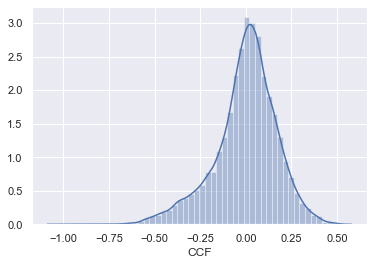

In [290]:
sns.distplot(ead_targets_test-y_hat_test_ead)

In [291]:
# resembles a noraml dist and most of the values are symmetrically centered aeround the mean of 0 

In [292]:
# thus the model predictive power is relatively good seems to be a very good model methodologically

In [293]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736013
std,0.105194
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.161088


In [294]:
# sicne the actual values of CCF cannot be greater than 1 
# we see the predicted value greter than 1 because the linear model is not constrainde to produce predicted values
# in the interval [0,1] despite being trained on dep var target value 0 and 1

In [295]:
y_hat_test_ead = np.where(y_hat_test_ead<0,0,y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead>1,1,y_hat_test_ead)

In [296]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.735992
std,0.105127
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.000000


In [297]:
# we are 1 step away from closign the credit risk modeling cycle of the bank

### Expected Loss

In [299]:
# EL = PD*LGD*EAD

In [302]:
# banks don't really care about the loss they'll experience from the sinlgle borrower
# it is negligible compared to their overall exposure
# thus we find the expected loss across all borrowers

# the totoal expeced loss is the sum of the expected losses of all accounts

In [317]:
loan_data_preprocessed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,NaN,10.0,1985-01-01,395.0,36,2011-12-01,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Veri

In [306]:
# LGD and EAD only too written_off accounts from the same df

# also we have to impute mising values in 2 fields --- >.  mnth_since_last_delinq, mths_since_last_record --- fill with 0

In [318]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0,inplace=True)
loan_data_preprocessed['mths_since_last_record'].fillna(0,inplace=True)

In [319]:
# now the data we used for LGD AND EAD calc are the same but it differs for the PD model

# thus it is better to have separate df to apply for LGD and EAD model

In [320]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [321]:
loan_data_preprocessed_lgd_ead.drop(feature_ref_cat,axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [322]:
# LGD = 1-recovery_rate

In [323]:
# we have discoverd the estimated recovery rate taking the outputs from 2 models-- stage 1 logistic reg and stage 2 linear
# regression model

In [324]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [325]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [326]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1']*loan_data_preprocessed['recovery_rate_st_2']

In [327]:
# since linear reg can produce output > 1 and < 0.. we need to amend that

In [328]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate']<0,0,loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate']>1,1,loan_data_preprocessed['recovery_rate'])


In [329]:
loan_data_preprocessed['LGD'] = 1-loan_data_preprocessed['recovery_rate']

In [330]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.920155
std           0.057511
min           0.659786
25%           0.873211
50%           0.899168
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [332]:
# lets calculate EAD

# here we modeled CCF - the proporiton fo the original amoint of loan that is still outstanding when the borrower defaulted

In [333]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [334]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF']<0,0,loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF']>1,1,loan_data_preprocessed['CCF'])


In [335]:
# EAD = CCF*funded_amount

In [336]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF']*loan_data_preprocessed['funded_amnt']

In [337]:
loan_data_preprocessed['EAD'].describe()

count    466285.000000
mean      10814.846760
std        6935.184562
min         190.347372
25%        5495.101413
50%        9208.479591
75%       14692.844549
max       35000.000000
Name: EAD, dtype: float64

In [338]:
loan_data_preprocessed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,NaN,10.0,1985-01-01,395.0,36,2011-12-01,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0.086271,0.086271,0.913729,0.589922

In [339]:
# now let us calc PD 

In [341]:
# FOR PD we need entirely diff set of input varibales
# these are the dummy variable we crated specifically for the PD model

In [342]:
# we can just import the two dataset(train and test) we created and save as csv while modeling PD model

In [343]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')

In [344]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train,loan_data_inputs_test],axis=0) # merge along the rows

In [345]:
loan_data_inputs_pd.shape

(466285, 324)

In [346]:
loan_data_preprocessed.shape

(466285, 213)

In [347]:
# at some point, we have to match the number of rows of the dataframe where we calculayed the PD with the rows of the 
# dataframe whre we calcualte LGD nad. EAD

In [348]:
loan_data_inputs_pd.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_d_date,mths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date_factor,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.821,int_rate:>20.

In [349]:
# the original index of the records from the train and test datafame from the PD models are ontained in Unnamed:0 column

In [350]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [351]:
loan_data_inputs_pd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_d_date,mths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date_factor,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.821,int_rate:>20.821,funded_

In [352]:
# for PD MODEL esimation ,we need only the variable are part of PD model estimaiton

In [353]:
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Source Verified',
'verification_status:Not Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_date:<38',
'mths_since_issue_date:38-39',
'mths_since_issue_date:40-41',
'mths_since_issue_date:42-48',
'mths_since_issue_date:49-52',
'mths_since_issue_date:53-64',
'mths_since_issue_date:65-84',
'mths_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.821',
'int_rate:>20.821',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:142-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K']

In [355]:
# we need to remove one dummy variable for each original category,, which serves as reference category

In [356]:
ref_cat_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_date:>84',
'int_rate:>20.821',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',
'dti:>35',
'mths_since_last_record:0-2',
'total_rev_hi_lim:<=5K']

In [357]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]

In [358]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_cat_pd,axis=1)

In [359]:
loan_data_inputs_pd_temp.shape

(466285, 98)

In [360]:
reg_pd = pickle.load(open('pd_model.sav','rb'))

In [362]:
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[:][:,0]

array([0.03006178, 0.09396639, 0.03598706, ..., 0.02688348, 0.03884538,
       0.04979429])

In [361]:
# return 2 array, the first number of each lower level array is the prob of 0 (prob of deault) while the second -
# the prob of 1 (prob of non-default)

In [363]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[:][:,0]

In [364]:
loan_data_inputs_pd['PD'].describe()

count    466285.000000
mean          0.109320
std           0.070477
min           0.006788
25%           0.056291
50%           0.093737
75%           0.146516
max           0.613566
Name: PD, dtype: float64

In [365]:
# LGD and EAD are in 'loan_data_preprocessed'
# PD is in 'loan_data_inputs_pd'

In [366]:
# we should make sure while concating, the index in thse 2 df showld be matcihng

In [367]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed,loan_data_inputs_pd],axis=1)

In [369]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] *loan_data_preprocessed_new['EAD']

In [370]:
loan_data_preprocessed_new['EL'].describe()

count    466285.000000
mean       1074.372994
std        1087.023762
min           9.396855
25%         357.271307
50%         705.444166
75%        1392.410131
max       11862.482798
Name: EL, dtype: float64

In [371]:
# the average expected loss per exposure is about 1074 dollars
# now we can check expected loss for every single loan

In [372]:
loan_data_preprocessed_new[['funded_amnt','PD','LGD','EAD','EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.171182,0.913729,2949.608449,461.359801
1,2500,2500,0.270818,0.915482,1944.433378,482.080569
2,2400,2400,0.193750,0.919484,1579.934302,281.465650
3,10000,10000,0.205285,0.904924,6606.559612,1227.280323
4,3000,3000,0.132894,0.911453,2124.631667,257.349061


In [373]:
# eg, for 2400 dollar laon in index 2, we expect to lose 281.46 dollar 

In [374]:
# we can also calculate expected loss on portfolio level

In [375]:
loan_data_preprocessed_new['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,466285.000000,466285.000000
mean,14291.801044,14291.801044
std,8274.371300,8274.371300
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,12000.000000,12000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


In [376]:
loan_data_preprocessed_new['EL'].sum()

500964011.5414072

In [377]:
# around 500 mill dollar loss on portfolio level

In [378]:
# it makes sense to calculate Expected loss as the proporitn of the total funded amount 
# to calc the totla portfolio amount, just sum the total funded_amnt

In [379]:
loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [380]:
# around 6.7 billion

In [381]:
# the EL realtibe the total portfoli is: sum of EL col. / sum of Fundend_amth col.

In [382]:
loan_data_preprocessed_new['EL'].sum()/loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    0.075174
funded_amnt    0.075174
dtype: float64

In [383]:
# about 7.51 percent

In [ ]:
# a bank usually holds 10% of its assests as capital so its expected loss on its loan portfolio should be less than its
# capital
# thus observed El value are betn 2%-10%

# depending on this exposure a bank magmt can decide to be more agressive/conse 